# Assignment 3 - Neural Networks
### Name: Aakash Thatte
### Roll number: 12041590

#### References:
1. https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html
2. 
3.

### Report

#### Part 1: 
Summary of approaches used:
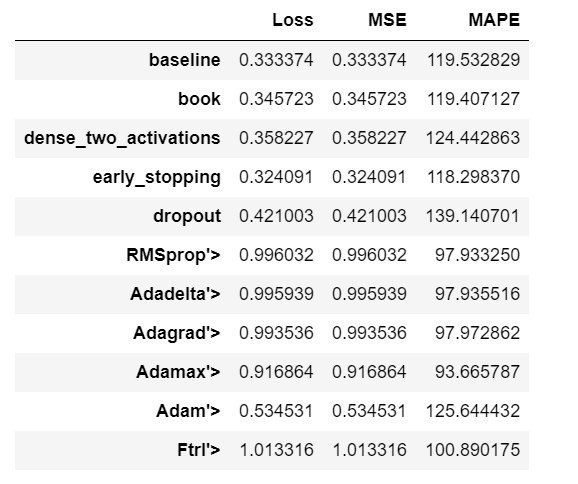

#### Part 2:
Summary of approaches used:
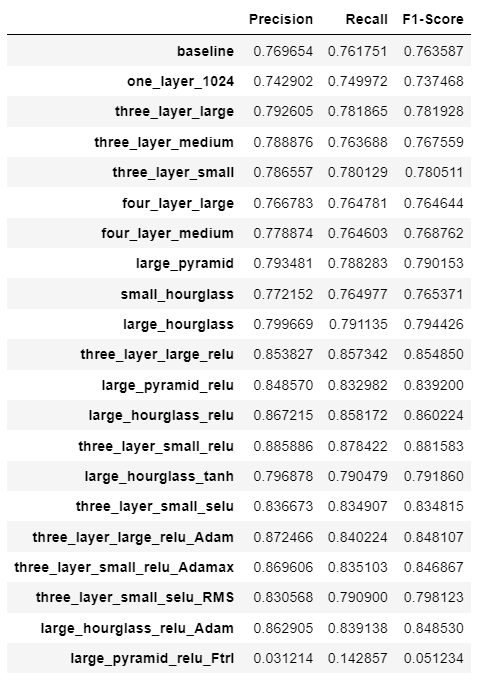
<!-- 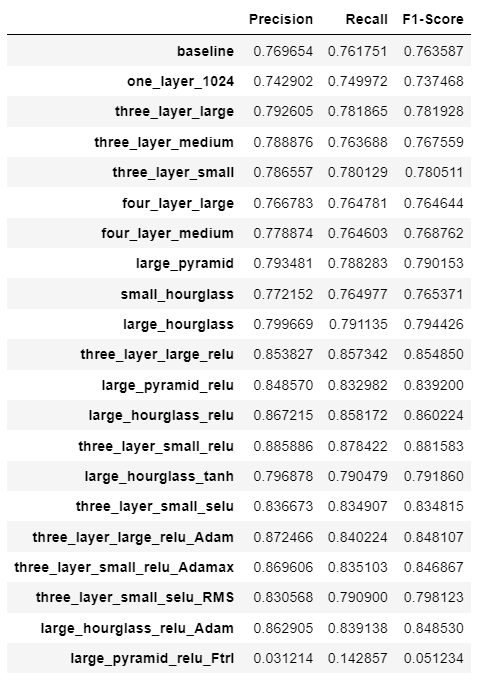 -->

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dill

In [ ]:
# dill.load_session('notebook_env.db')

### Part 1: Predicting Taxi Fares

In [3]:
train = pd.read_csv("new_small.csv")
test = pd.read_csv("test_ready.csv")

In [6]:
train.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'],axis=1,inplace=True)
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,date,month,year,H_Distance,manhattan_dist
0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,19,8,2009-04-08,4,2009,1.116850,0.808619
1,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,13,22,2011-02-22,2,2011,2.715959,2.044722
2,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,21,7,2010-10-07,10,2010,5.101370,4.018520
3,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,22,2,2009-10-02,10,2009,4.800593,3.715390
4,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,8,7,2009-10-07,10,2009,7.088301,5.523574


In [7]:
test.drop('Unnamed: 0',axis=1,inplace=True)
test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,date,month,year,H_Distance,manhattan_dist
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,13,27,2015-01-27,1,2015,2.323260,1.838975
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,13,27,2015-01-27,1,2015,2.425353,1.572309
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,11,8,2011-10-08,10,2011,0.618628,0.386996
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,21,1,2012-12-01,12,2012,1.961033,1.537998
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,21,1,2012-12-01,12,2012,5.387301,4.249087


In [23]:
# Adding day of week
train['day_of_week'] = pd.to_datetime(train['date']).dt.day_name()
test['day_of_week'] = pd.to_datetime(test['date']).dt.day_name()

In [24]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,date,month,year,H_Distance,manhattan_dist,day_of_week
0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,19,8,2009-04-08,4,2009,1.116850,0.808619,Wednesday
1,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,13,22,2011-02-22,2,2011,2.715959,2.044722,Tuesday
2,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,21,7,2010-10-07,10,2010,5.101370,4.018520,Thursday
3,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,22,2,2009-10-02,10,2009,4.800593,3.715390,Friday
4,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,8,7,2009-10-07,10,2009,7.088301,5.523574,Wednesday


In [26]:
# For hour, we will do some preprocessing
# Use morning as 6am to 12pm
# Use afternoon as 12pm to 6pm
# Use evening as 6pm to 12am
# Use night as 12am to 6am
# train['hour'].unique() has 0 to 23
def hour_to_category(hour):
    if hour>=6 and hour<= 12:
        return 'morning'
    elif hour >12 and hour<=18:
        return 'afternoon'
    elif hour>18 and hour<=23:
        return 'evening'
    else:
        return 'night'
    
train['time_of_day'] = train['hour'].map(hour_to_category)
test['time_of_day'] = test['hour'].map(hour_to_category)

In [27]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,date,month,year,H_Distance,manhattan_dist,day_of_week,time_of_day
0,2009-04-08 19:11:10.0000004,4.9,2009-04-08 19:11:10 UTC,-73.998287,40.727490,-73.989854,40.735239,2,19,8,2009-04-08,4,2009,1.116850,0.808619,Wednesday,evening
1,2011-02-22 13:35:00.000000121,6.9,2011-02-22 13:35:00 UTC,-73.971638,40.763382,-73.953767,40.783715,1,13,22,2011-02-22,2,2011,2.715959,2.044722,Tuesday,afternoon
2,2010-10-07 21:09:35.0000002,14.1,2010-10-07 21:09:35 UTC,-74.003545,40.707399,-73.981312,40.750071,1,21,7,2010-10-07,10,2010,5.101370,4.018520,Thursday,evening
3,2009-10-02 22:51:00.000000140,12.1,2009-10-02 22:51:00 UTC,-74.004532,40.707465,-73.977908,40.745633,5,22,2,2009-10-02,10,2009,4.800593,3.715390,Friday,evening
4,2009-10-07 08:40:00.00000096,21.3,2009-10-07 08:40:00 UTC,-73.958883,40.780737,-73.995530,40.723353,1,8,7,2009-10-07,10,2009,7.088301,5.523574,Wednesday,morning


In [97]:
train.to_csv("train.csv")
test.to_csv("test.csv")

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#### train and test are dataframes that can be used to create X and y.

In [3]:
train_df = train[['fare_amount','manhattan_dist','H_Distance','passenger_count','day_of_week','time_of_day']]
test_df = test[['manhattan_dist','H_Distance','passenger_count','day_of_week','time_of_day']]
X = train_df.drop('fare_amount',axis=1)
y = train_df['fare_amount']

In [4]:
categorical = ['passenger_count','day_of_week','time_of_day']
numerical = ['fare_amount','manhattan_dist','H_Distance']

In [5]:
X.head()

,manhattan_dist,H_Distance,passenger_count,day_of_week,time_of_day
0,0.808619,1.116850,2,Wednesday,evening
1,2.044722,2.715959,1,Tuesday,afternoon
2,4.018520,5.101370,1,Thursday,evening
3,3.715390,4.800593,5,Friday,evening
4,5.523574,7.088301,1,Wednesday,morning


In [6]:
X_encoded = pd.get_dummies(X)
final_test_df = pd.get_dummies(test_df)

In [7]:
X_encoded.head()

,manhattan_dist,H_Distance,passenger_count,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,time_of_day_afternoon,time_of_day_evening,time_of_day_morning,time_of_day_night
0,0.808619,1.116850,2,0,0,0,0,0,0,1,0,1,0,0
1,2.044722,2.715959,1,0,0,0,0,0,1,0,1,0,0,0
2,4.018520,5.101370,1,0,0,0,0,1,0,0,0,1,0,0
3,3.715390,4.800593,5,1,0,0,0,0,0,0,0,1,0,0
4,5.523574,7.088301,1,0,0,0,0,0,0,1,0,0,1,0


Scaling the fare_amount column/ target column.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_arr = np.array([y])
y_scaled = scaler.fit_transform(y_arr.reshape(y_arr.shape[1],1))

In [9]:
y_scaled[:5], y_scaled.shape

(array([[-0.92974173],
        [-0.44641109],
        [ 1.2935792 ],
        [ 0.81024856],
        [ 3.03356948]]),
 (80552, 1))

In [10]:
y_scaled = y_scaled.reshape(80552,)

In [11]:
y_scaled[:5]

array([-0.92974173, -0.44641109,  1.2935792 ,  0.81024856,  3.03356948])

<h3>Splitting the train data and creating a fast loading dataset</h3>

In [2]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_scaled, test_size=0.2, random_state=42)

In [103]:
# tf_train_dataset = tf.data.Dataset.from_tensor_slices((X_train.values,y_train))
# tf_val_dataset = tf.data.Dataset.from_tensor_slices((X_test.values,y_test))

In [104]:
# print(tf_train_dataset)
# print(tf_val_dataset)

In [3]:
def results(model,X_test,y_test):
    a = model.evaluate(X_test,y_test)
    return {'Loss':a[0],'MSE':a[1],'MAPE':a[2]}

In [14]:
all_results = {}

### A. Creating the baseline model

In [3]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [51]:
baseline = Sequential([
    layers.Dense(16,activation='sigmoid'),
    layers.Dense(8,activation='sigmoid'),
#     layers.Dense(16,activation='sigmoid'),
    layers.Dense(1)
])
baseline.compile(
    loss=tf.keras.losses.mse,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mse','mape'])

In [52]:
baseline_hist = baseline.fit(X_train,y_train, validation_data=(X_test,y_test),epochs=20,batch_size=128)

Epoch 1/20
504/504 [==============================] - 2s 3ms/step - loss: 0.8443 - mse: 0.8443 - mape: 96.3293 - val_loss: 0.6919 - val_mse: 0.6919 - val_mape: 98.5270
Epoch 2/20
504/504 [==============================] - 1s 3ms/step - loss: 0.5349 - mse: 0.5349 - mape: 107.8109 - val_loss: 0.4532 - val_mse: 0.4532 - val_mape: 122.8936
Epoch 3/20
504/504 [==============================] - 1s 2ms/step - loss: 0.4031 - mse: 0.4031 - mape: 125.6606 - val_loss: 0.3932 - val_mse: 0.3932 - val_mape: 131.8385
Epoch 4/20
504/504 [==============================] - 1s 3ms/step - loss: 0.3651 - mse: 0.3651 - mape: 126.6903 - val_loss: 0.3676 - val_mse: 0.3676 - val_mape: 128.0693
Epoch 5/20
504/504 [==============================] - 1s 3ms/step - loss: 0.3478 - mse: 0.3478 - mape: 124.8370 - val_loss: 0.3545 - val_mse: 0.3545 - val_mape: 125.2121
Epoch 6/20
504/504 [==============================] - 1s 3ms/step - loss: 0.3381 - mse: 0.3381 - mape: 122.7754 - val_loss: 0.3472 - val_mse: 0.3472 - v

In [53]:
baseline_results = results(baseline,X_test,y_test)
baseline_results

504/504 [==============================] - 1s 2ms/step - loss: 0.3334 - mse: 0.3334 - mape: 119.5328


{'Loss': 0.3333742916584015,
 'MSE': 0.3333742916584015,
 'MAPE': 119.53282928466797}

In [78]:
all_results['baseline']=baseline_results

### B. Experimenting with number of layers, units, etc.

In [54]:
wide_model = Sequential([
#     layers.Dense(14,activation='relu'),
#     layers.Dense(20,activation='relu'),
    layers.Dense(1,activation='sigmoid'),
    layers.Dense(1)
])
wide_model.compile(loss='mse',optimizer='sgd',metrics=['mse','mape'])
wide_hist = wide_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
2014/2014 [==============================] - 5s 2ms/step - loss: 0.5764 - mse: 0.5764 - mape: 113.9801 - val_loss: 0.4038 - val_mse: 0.4038 - val_mape: 122.7203
Epoch 2/3
2014/2014 [==============================] - 4s 2ms/step - loss: 0.3544 - mse: 0.3544 - mape: 121.6141 - val_loss: 0.3535 - val_mse: 0.3535 - val_mape: 117.1499
Epoch 3/3
2014/2014 [==============================] - 4s 2ms/step - loss: 0.3347 - mse: 0.3347 - mape: 120.4667 - val_loss: 0.3457 - val_mse: 0.3457 - val_mape: 119.4071


In [56]:
wide_results = results(wide_model,X_test,y_test)
wide_results

504/504 [==============================] - 1s 2ms/step - loss: 0.3457 - mse: 0.3457 - mape: 119.4071


{'Loss': 0.345723420381546,
 'MSE': 0.345723420381546,
 'MAPE': 119.4071273803711}

In [79]:
all_results['book'] = wide_results

### C. Experimenting with activation functions

In [57]:
# USing less units and more layers with sigmoid is giving mape of around 98%, other combinations are giving > 100%
# 
act_model = Sequential([
    layers.Dense(1,activation='tanh'),
    layers.Dense(8,activation='tanh'),
    layers.Dense(8,activation='sigmoid'),
    layers.Dense(10,activation='sigmoid'),
    layers.Dense(8,activation='sigmoid'),
    layers.Dense(1)
])
act_model.compile(loss='mse',optimizer='sgd',metrics=['mse','mape'])
act_hist = act_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
2014/2014 [==============================] - 6s 3ms/step - loss: 0.9700 - mse: 0.9700 - mape: 101.4504 - val_loss: 0.8852 - val_mse: 0.8852 - val_mape: 97.7523
Epoch 2/3
2014/2014 [==============================] - 5s 3ms/step - loss: 0.5257 - mse: 0.5257 - mape: 124.4512 - val_loss: 0.3894 - val_mse: 0.3894 - val_mape: 123.7700
Epoch 3/3
2014/2014 [==============================] - 5s 3ms/step - loss: 0.3632 - mse: 0.3632 - mape: 129.7626 - val_loss: 0.3582 - val_mse: 0.3582 - val_mape: 124.4429


In [58]:
act_results = results(act_model,X_test,y_test)
act_results

504/504 [==============================] - 1s 2ms/step - loss: 0.3582 - mse: 0.3582 - mape: 124.4429


{'Loss': 0.3582274913787842,
 'MSE': 0.3582274913787842,
 'MAPE': 124.44286346435547}

In [80]:
all_results['dense_two_activations']=act_results

### D. Experimenting with regularization.

In [62]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
reg_model = Sequential([
    layers.Dense(10,activation='relu'),
    layers.Dense(1)
])
reg_model.compile(loss='mse',optimizer='adam',metrics=['mse','mape'])
reg_hist = reg_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,callbacks=[callback],batch_size=128)
# stopped at 9th epoch

Epoch 1/10
504/504 [==============================] - 2s 2ms/step - loss: 0.5013 - mse: 0.5013 - mape: 146.1452 - val_loss: 0.3466 - val_mse: 0.3466 - val_mape: 120.6681
Epoch 2/10
504/504 [==============================] - 1s 3ms/step - loss: 0.3293 - mse: 0.3293 - mape: 117.4301 - val_loss: 0.3388 - val_mse: 0.3388 - val_mape: 119.3739
Epoch 3/10
504/504 [==============================] - 1s 3ms/step - loss: 0.3253 - mse: 0.3253 - mape: 117.2286 - val_loss: 0.3355 - val_mse: 0.3355 - val_mape: 119.3418
Epoch 4/10
504/504 [==============================] - 1s 2ms/step - loss: 0.3222 - mse: 0.3222 - mape: 117.2446 - val_loss: 0.3333 - val_mse: 0.3333 - val_mape: 114.3572
Epoch 5/10
504/504 [==============================] - 1s 2ms/step - loss: 0.3192 - mse: 0.3192 - mape: 116.9629 - val_loss: 0.3281 - val_mse: 0.3281 - val_mape: 116.4746
Epoch 6/10
504/504 [==============================] - 1s 2ms/step - loss: 0.3171 - mse: 0.3171 - mape: 116.8354 - val_loss: 0.3263 - val_mse: 0.3263 -

In [63]:
len(reg_hist.history['loss'])

10

In [64]:
reg_result = results(reg_model,X_test,y_test)
reg_result

504/504 [==============================] - 1s 2ms/step - loss: 0.3241 - mse: 0.3241 - mape: 118.2984


{'Loss': 0.32409051060676575,
 'MSE': 0.32409051060676575,
 'MAPE': 118.29837036132812}

In [81]:
all_results['early_stopping'] = reg_result

In [65]:
drop_model = Sequential([
    layers.Dense(15,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(5,activation='sigmoid'),
    layers.Dense(5,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(5,activation='sigmoid'),
    layers.Dense(5,activation='relu'),
    layers.Dense(5,activation='sigmoid'),
    layers.Dense(1)
])
drop_model.compile(loss='mse',optimizer='sgd',metrics=['mse','mape'])
drop_hist = drop_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=128)

Epoch 1/5
504/504 [==============================] - 2s 3ms/step - loss: 0.9902 - mse: 0.9902 - mape: 99.7376 - val_loss: 0.9908 - val_mse: 0.9908 - val_mape: 99.1851
Epoch 2/5
504/504 [==============================] - 2s 3ms/step - loss: 0.9576 - mse: 0.9576 - mape: 98.1772 - val_loss: 0.9427 - val_mse: 0.9427 - val_mape: 96.7538
Epoch 3/5
504/504 [==============================] - 2s 3ms/step - loss: 0.8781 - mse: 0.8781 - mape: 98.2507 - val_loss: 0.7924 - val_mse: 0.7924 - val_mape: 96.7671
Epoch 4/5
504/504 [==============================] - 2s 3ms/step - loss: 0.6632 - mse: 0.6632 - mape: 116.1441 - val_loss: 0.5165 - val_mse: 0.5165 - val_mape: 127.5764
Epoch 5/5
504/504 [==============================] - 2s 3ms/step - loss: 0.5004 - mse: 0.5004 - mape: 140.6829 - val_loss: 0.4210 - val_mse: 0.4210 - val_mape: 139.1407


In [66]:
drop_result = results(drop_model,X_test,y_test)
drop_result

504/504 [==============================] - 1s 2ms/step - loss: 0.4210 - mse: 0.4210 - mape: 139.1407


{'Loss': 0.42100295424461365,
 'MSE': 0.42100295424461365,
 'MAPE': 139.1407012939453}

In [82]:
all_results['dropout'] = drop_result 

### E. Experiment with 2 more optimizers

In [86]:
optimizers = [tf.keras.optimizers.RMSprop, tf.keras.optimizers.Adadelta, tf.keras.optimizers.Adagrad, 
              tf.keras.optimizers.Adamax, tf.keras.optimizers.Adam, tf.keras.optimizers.Ftrl]
opt_model = Sequential([
    layers.Dense(1,activation='sigmoid'),
    layers.Dense(1,activation='sigmoid'),
    layers.Dense(1,activation='sigmoid'),
    layers.Dense(1)
])
for o in optimizers:
    print(o)
    opt_model.compile(loss='mse',optimizer=o(),metrics=['mse','mape'])
    opt_model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=128,verbose=0)
    opt_result = results(opt_model,X_test,y_test)
    all_results[str(o).split('.')[-1]] = opt_result
    print(opt_result)
    print("----------------------------------------------------------------------------------")

<class 'keras.optimizer_v2.rmsprop.RMSprop'>
504/504 [==============================] - 1s 2ms/step - loss: 0.9960 - mse: 0.9960 - mape: 97.9333
{'Loss': 0.9960322976112366, 'MSE': 0.9960322976112366, 'MAPE': 97.9332504272461}
----------------------------------------------------------------------------------
<class 'keras.optimizer_v2.adadelta.Adadelta'>
504/504 [==============================] - 1s 2ms/step - loss: 0.9959 - mse: 0.9959 - mape: 97.9355
{'Loss': 0.9959388971328735, 'MSE': 0.9959388971328735, 'MAPE': 97.93551635742188}
----------------------------------------------------------------------------------
<class 'keras.optimizer_v2.adagrad.Adagrad'>
504/504 [==============================] - 1s 2ms/step - loss: 0.9935 - mse: 0.9935 - mape: 97.9729
{'Loss': 0.9935358166694641, 'MSE': 0.9935358166694641, 'MAPE': 97.97286224365234}
----------------------------------------------------------------------------------
<class 'keras.optimizer_v2.adamax.Adamax'>
504/504 [==============

In [89]:
pd.DataFrame(all_results).transpose()
# all_results

,Loss,MSE,MAPE
baseline,0.333374,0.333374,119.532829
book,0.345723,0.345723,119.407127
dense_two_activations,0.358227,0.358227,124.442863
early_stopping,0.324091,0.324091,118.298370
dropout,0.421003,0.421003,139.140701
RMSprop'>,0.996032,0.996032,97.933250
Adadelta'>,0.995939,0.995939,97.935516
Adagrad'>,0.993536,0.993536,97.972862
Adamax'>,0.916864,0.916864,93.665787
Adam'>,0.534531,0.534531,125.644432


In [35]:
# Something new, giving mape around 83%
from tensorflow.keras import regularizers
model = Sequential()
model.add(Dense(1, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(Dense(1, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dense(128, activation='relu'))
# model.add(layers.BatchNormalization())
# model.add(Dense(8, activation='relu'))
# model.add(layers.BatchNormalization())
model.add(Dense(1,activation='relu'))


model.compile(loss='mse', optimizer='adagrad', metrics=['mae','mape'])

history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=5, 
                    verbose=1, validation_data=(X_test, y_test))

Epoch 1/5
504/504 [==============================] - 2s 2ms/step - loss: 0.9969 - mae: 0.7718 - mape: 100.0000 - val_loss: 1.0125 - val_mae: 0.7752 - val_mape: 100.0000
Epoch 2/5
504/504 [==============================] - 1s 1ms/step - loss: 0.9969 - mae: 0.7718 - mape: 100.0000 - val_loss: 1.0125 - val_mae: 0.7752 - val_mape: 100.0000
Epoch 3/5
504/504 [==============================] - 1s 2ms/step - loss: 0.9969 - mae: 0.7718 - mape: 100.0000 - val_loss: 1.0125 - val_mae: 0.7752 - val_mape: 100.0000
Epoch 4/5
504/504 [==============================] - 1s 2ms/step - loss: 0.9969 - mae: 0.7718 - mape: 100.0000 - val_loss: 1.0125 - val_mae: 0.7752 - val_mape: 100.0000
Epoch 5/5
504/504 [==============================] - 1s 2ms/step - loss: 0.9969 - mae: 0.7718 - mape: 100.0000 - val_loss: 1.0125 - val_mae: 0.7752 - val_mape: 100.0000


In [111]:
model.evaluate(X_test,y_test)

504/504 [==============================] - ETA: 0s - loss: nan - mae: nan - mape: na - 0s 771us/step - loss: nan - mae: nan - mape: nan


[nan, nan, nan]

## Part 2: HCaptcha

In [4]:
# Exploring training data
import os
train_dir = "hcaptcha_dataset/train/"
test_dir = "hcaptcha_dataset/test/"

In [5]:
# Preparing training and test data
from PIL import ImageOps, Image
import cv2
x_train_color = []
y_train = []
x_test_color = []
y_test = []

x_train_gray = []
x_test_gray = []

for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir+folder):
        img = Image.open(train_dir+folder+"/"+image)
        gray_image = ImageOps.grayscale(img)
        img = np.array(img)
        gray_image = np.array(gray_image)
#         if img.shape!=(128,128,3):
        img = cv2.resize(img,(32,32))
        gray_image = cv2.resize(gray_image,(32,32))
        x_train_color.append(img)
        y_train.append(folder)
        x_train_gray.append(gray_image)
        
    print(f"Training: {folder} images added.")
        
for folder in os.listdir(test_dir):
    for image in os.listdir(test_dir+folder):
        img = Image.open(test_dir+folder+"/"+image)
        gray_image = ImageOps.grayscale(img)
        img = np.array(img)
        gray_image = np.array(gray_image)
#         if img.shape!=(128,128,3):
        img = cv2.resize(img,(32,32))
        gray_image = cv2.resize(gray_image,(32,32))
        x_test_color.append(img)
        y_test.append(folder)
        x_test_gray.append(gray_image)
    print(f"Test: {folder} images added.")

Training: airplane images added.
Training: bicycle images added.
Training: boat images added.
Training: motorbus images added.
Training: motorcycle images added.
Training: seaplane images added.
Training: truck images added.
Test: airplane images added.
Test: bicycle images added.
Test: boat images added.
Test: motorbus images added.
Test: motorcycle images added.
Test: seaplane images added.
Test: truck images added.


In [6]:
x_train_color = np.array(x_train_color)
y_train = np.array(y_train)
x_test_color = np.array(x_test_color)
y_test = np.array(y_test)

x_train_gray = np.array(x_train_gray)
x_test_gray = np.array(x_test_gray)

In [8]:
x_train_gray.shape

(3018, 32, 32)

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
oh = preprocessing.OneHotEncoder(sparse=False)
y_train_labelled = le.fit_transform(y_train)
y_test_labelled = le.transform(y_test)

y_train_oh = oh.fit_transform(y_train.reshape(3018,1))
y_test_oh = oh.transform(y_test.reshape(746,1))

In [7]:
np.unique(y_train_labelled), y_test_labelled.shape, y_train.shape

(array([0, 1, 2, 3, 4, 5, 6], dtype=int64), (746,), (3018,))

In [8]:
y_train_oh

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [8]:
x_train_gray_flat = np.reshape(x_train_gray,(x_train_gray.shape[0],x_train_gray.shape[1]*x_train_gray.shape[1]))
x_test_gray_flat = np.reshape(x_test_gray,(x_test_gray.shape[0],x_test_gray.shape[1]*x_test_gray.shape[1]))
x_train_gray_flat.shape, x_test_gray_flat.shape

((3018, 1024), (746, 1024))

In [9]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
x_train_scaled = s.fit_transform(x_train_gray_flat)
x_test_scaled = s.transform(x_test_gray_flat)

In [16]:
all_nets = {}

### Baseline model

In [31]:
baseline_hc = Sequential([
    layers.Dense(1024),
    layers.Dense(256),
    layers.Dense(64),
    layers.Dense(7,activation='softmax')
])
baseline_hc.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [32]:
baseline_hc_hist = baseline_hc.fit(x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=10, batch_size=256)

Epoch 1/10
12/12 [==============================] - 1s 30ms/step - loss: 4.2656 - accuracy: 0.5613 - val_loss: 2.3070 - val_accuracy: 0.7078
Epoch 2/10
12/12 [==============================] - 0s 22ms/step - loss: 1.6698 - accuracy: 0.7353 - val_loss: 1.3043 - val_accuracy: 0.7239
Epoch 3/10
12/12 [==============================] - 0s 21ms/step - loss: 0.9449 - accuracy: 0.7594 - val_loss: 0.9239 - val_accuracy: 0.7198
Epoch 4/10
12/12 [==============================] - 0s 22ms/step - loss: 0.6240 - accuracy: 0.7889 - val_loss: 0.7185 - val_accuracy: 0.7842
Epoch 5/10
12/12 [==============================] - 0s 21ms/step - loss: 0.4910 - accuracy: 0.8340 - val_loss: 0.6379 - val_accuracy: 0.7976
Epoch 6/10
12/12 [==============================] - 0s 21ms/step - loss: 0.4221 - accuracy: 0.8535 - val_loss: 0.6232 - val_accuracy: 0.7976
Epoch 7/10
12/12 [==============================] - 0s 27ms/step - loss: 0.3708 - accuracy: 0.8691 - val_loss: 0.6448 - val_accuracy: 0.7922
Epoch 8/10
12

In [33]:
baseline_hc.evaluate(x_test_scaled,y_test_labelled)

24/24 [==============================] - 0s 4ms/step - loss: 0.6951 - accuracy: 0.7895


[0.695116400718689, 0.7895442247390747]

In [34]:
baseline_probs = baseline_hc.predict(x_test_scaled)

In [35]:
baseline_preds = baseline_probs.argmax(axis=1)

In [36]:
baseline_preds[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [11]:
from sklearn.metrics import precision_recall_fscore_support

In [38]:
precision_recall_fscore_support(y_test_labelled, baseline_preds, average='macro')

(0.7696535024149592, 0.7617509646227499, 0.7635869812834878, None)

In [12]:
def calculate_results(y_true,y_preds,average='macro'):
    p, r, f, n = precision_recall_fscore_support(y_true, y_preds, average=average)
    return {"Precision":p,"Recall":r,"F1-Score":f}

In [13]:
def preds(model,test):
    return model.predict(test).argmax(axis=1)

In [41]:
baseline_results_macro = calculate_results(y_test_labelled, baseline_preds, average='macro')
baseline_results_micro = calculate_results(y_test_labelled, baseline_preds, average='micro')

In [42]:
baseline_results_micro

{'Precision': 0.789544235924933,
 'Recall': 0.789544235924933,
 'F1-Score': 0.789544235924933}

In [43]:
all_nets['baseline'] = baseline_results_macro

### Experiment with number of layers and units.
- I will fix some number of layers and units and create models for each.
- Then I will tabulate their results.

In [66]:
# Experiment layers units - elu
# Using tanh reduced the accuracy
m1 = Sequential([
        layers.Dense(1024),
        layers.Dense(7,activation='softmax')
    ], name="one_layer_1024")
    
m2 = Sequential([
        layers.Dense(1024),
        layers.Dense(512),
        layers.Dense(7,activation='softmax')
    ], name="one_layer_1024")
    
m3 = Sequential([
        layers.Dense(1024),
        layers.Dense(512),
        layers.Dense(512),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_large")
    
m4 = Sequential([
        layers.Dense(512),
        layers.Dense(512),
        layers.Dense(256),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_medium")
    
m5 = Sequential([
        layers.Dense(512),
        layers.Dense(256),
        layers.Dense(128),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small")
    
m6 = Sequential([
        layers.Dense(1024),
        layers.Dense(1024),
        layers.Dense(1024),
        layers.Dense(1024),
        layers.Dense(7,activation='softmax')
    ], name="four_layer_large")
    
m7 = Sequential([
        layers.Dense(512),
        layers.Dense(256),
        layers.Dense(256),
        layers.Dense(32),
        layers.Dense(7,activation='softmax')
    ], name="four_layer_medium")
    
m8 = Sequential([
        layers.Dense(1024),
        layers.Dense(512),
        layers.Dense(256),
        layers.Dense(128),
        layers.Dense(64),
        layers.Dense(32),
        layers.Dense(16),
        layers.Dense(7,activation='softmax')
    ], name="large_pyramid")
    
m9 = Sequential([
        layers.Dense(1024),
        layers.Dense(512),
        layers.Dense(1024),
        layers.Dense(7,activation='softmax')
    ], name="small_hourglass")
    
m10 = Sequential([
        layers.Dense(1024),
        layers.Dense(512),
        layers.Dense(256),
        layers.Dense(32),
        layers.Dense(256),
        layers.Dense(512),
        layers.Dense(1024),
        layers.Dense(7,activation='softmax')
    ], name="large_hourglass")
    
models = [m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]

def experiment(models):
    for m in models:
        print(f"Experimenting with {m.name}")
        m.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
        h = m.fit(
            x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=5, batch_size=256
        )
        r = calculate_results(y_test_labelled,preds(m,x_test_scaled))
        all_nets[m.name] = r

In [68]:
experiment(models)

Experimenting with one_layer_1024
Epoch 1/5
12/12 [==============================] - 1s 25ms/step - loss: 1.9576 - accuracy: 0.5871 - val_loss: 1.2887 - val_accuracy: 0.7453
Epoch 2/5
12/12 [==============================] - 0s 19ms/step - loss: 1.1390 - accuracy: 0.7518 - val_loss: 1.0182 - val_accuracy: 0.7748
Epoch 3/5
12/12 [==============================] - 0s 20ms/step - loss: 0.7376 - accuracy: 0.8012 - val_loss: 0.8504 - val_accuracy: 0.7721
Epoch 4/5
12/12 [==============================] - 0s 21ms/step - loss: 0.5751 - accuracy: 0.8241 - val_loss: 0.8159 - val_accuracy: 0.7802
Epoch 5/5
12/12 [==============================] - 0s 23ms/step - loss: 0.5079 - accuracy: 0.8323 - val_loss: 0.7661 - val_accuracy: 0.7976
Experimenting with one_layer_1024
Epoch 1/5
12/12 [==============================] - 1s 34ms/step - loss: 2.3930 - accuracy: 0.6011 - val_loss: 1.5296 - val_accuracy: 0.7212
Epoch 2/5
12/12 [==============================] - 0s 26ms/step - loss: 1.0339 - accuracy: 0

In [70]:
pd.DataFrame(all_nets).transpose()

,Precision,Recall,F1-Score
baseline,0.769654,0.761751,0.763587
one_layer_1024,0.742902,0.749972,0.737468
three_layer_large,0.792605,0.781865,0.781928
three_layer_medium,0.788876,0.763688,0.767559
three_layer_small,0.786557,0.780129,0.780511
four_layer_large,0.766783,0.764781,0.764644
four_layer_medium,0.778874,0.764603,0.768762
large_pyramid,0.793481,0.788283,0.790153
small_hourglass,0.772152,0.764977,0.765371
large_hourglass,0.799669,0.791135,0.794426


### Experimenting with activation functions and units.

In [71]:
a1 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_large_relu")

a2 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(16),
        layers.Dense(7,activation='softmax')
    ], name="large_pyramid_relu")

a3 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(1024,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="large_hourglass_relu")

a4 = Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_relu")
    
a5 = Sequential([
        layers.Dense(1024,activation='tanh'),
        layers.Dense(512,activation='tanh'),
        layers.Dense(256,activation='tanh'),
        layers.Dense(32,activation='tanh'),
        layers.Dense(256,activation='tanh'),
        layers.Dense(512,activation='tanh'),
        layers.Dense(1024,activation='tanh'),
        layers.Dense(7,activation='softmax')
    ], name="large_hourglass_tanh")

a6 = Sequential([
        layers.Dense(512,activation='tanh'),
        layers.Dense(256,activation='tanh'),
        layers.Dense(128,activation='tanh'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_tanh")

a6 = Sequential([
        layers.Dense(512,activation='selu'),
        layers.Dense(256,activation='selu'),
        layers.Dense(128,activation='selu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_selu")

models_act = [a1,a2,a3,a4,a5,a6]
experiment(models_act)

Experimenting with three_layer_large_relu
Epoch 1/5
12/12 [==============================] - 1s 43ms/step - loss: 1.0225 - accuracy: 0.6382 - val_loss: 0.6058 - val_accuracy: 0.7895
Epoch 2/5
12/12 [==============================] - 0s 35ms/step - loss: 0.4846 - accuracy: 0.8463 - val_loss: 0.4640 - val_accuracy: 0.8525
Epoch 3/5
12/12 [==============================] - 0s 31ms/step - loss: 0.3335 - accuracy: 0.8863 - val_loss: 0.4430 - val_accuracy: 0.8485
Epoch 4/5
12/12 [==============================] - 0s 30ms/step - loss: 0.2307 - accuracy: 0.9298 - val_loss: 0.4424 - val_accuracy: 0.8566
Epoch 5/5
12/12 [==============================] - 0s 30ms/step - loss: 0.1448 - accuracy: 0.9573 - val_loss: 0.4446 - val_accuracy: 0.8646
Experimenting with large_pyramid_relu
Epoch 1/5
12/12 [==============================] - 1s 45ms/step - loss: 1.3611 - accuracy: 0.5215 - val_loss: 0.7913 - val_accuracy: 0.7373
Epoch 2/5
12/12 [==============================] - 0s 38ms/step - loss: 0.7234 -

In [73]:
res = pd.DataFrame(all_nets).transpose()
res[res['F1-Score']>0.8]

,Precision,Recall,F1-Score
three_layer_large_relu,0.853827,0.857342,0.854850
large_pyramid_relu,0.848570,0.832982,0.839200
large_hourglass_relu,0.867215,0.858172,0.860224
three_layer_small_relu,0.885886,0.878422,0.881583
three_layer_small_selu,0.836673,0.834907,0.834815


### Experimenting with dropout, optimizers, etc.
- I will use only the above 5 models

In [74]:
optimizers = [tf.keras.optimizers.RMSprop, tf.keras.optimizers.Adadelta, tf.keras.optimizers.Adagrad, 
              tf.keras.optimizers.Adamax, tf.keras.optimizers.Adam, tf.keras.optimizers.Ftrl]


o1 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_large_relu_Adam")
o1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

o2 = Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_relu_Adamax")
o2.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adamax(),metrics=['accuracy'])

o3 = Sequential([
        layers.Dense(512,activation='selu'),
        layers.Dense(256,activation='selu'),
        layers.Dense(128,activation='selu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_selu_RMS")
o3.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(),metrics=['accuracy'])

o4 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(1024,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="large_hourglass_relu_Adam")
o4.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

o5 = Sequential([
        layers.Dense(1024,activation='relu'),
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(32,activation='relu'),
        layers.Dense(16),
        layers.Dense(7,activation='softmax')
    ], name="large_pyramid_relu_Ftrl")
o5.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Ftrl(),metrics=['accuracy'])

models_op = [o1,o2,o3,o4,o5]
def experiment_not_compile(models):
    for m in models:
        print(f"Experimenting with {m.name}")
        h = m.fit(
            x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=5, batch_size=256
        )
        r = calculate_results(y_test_labelled,preds(m,x_test_scaled))
        all_nets[m.name] = r
experiment_not_compile(models_op)

Experimenting with three_layer_large_relu_Adam
Epoch 1/5
12/12 [==============================] - 1s 43ms/step - loss: 0.9785 - accuracy: 0.6458 - val_loss: 0.5570 - val_accuracy: 0.8150
Epoch 2/5
12/12 [==============================] - 0s 31ms/step - loss: 0.4429 - accuracy: 0.8476 - val_loss: 0.4625 - val_accuracy: 0.8445
Epoch 3/5
12/12 [==============================] - 0s 29ms/step - loss: 0.2841 - accuracy: 0.9052 - val_loss: 0.4509 - val_accuracy: 0.8606
Epoch 4/5
12/12 [==============================] - 0s 33ms/step - loss: 0.1700 - accuracy: 0.9490 - val_loss: 0.4518 - val_accuracy: 0.8633
Epoch 5/5
12/12 [==============================] - 0s 33ms/step - loss: 0.0976 - accuracy: 0.9695 - val_loss: 0.4991 - val_accuracy: 0.8673
Experimenting with three_layer_small_relu_Adamax
Epoch 1/5
12/12 [==============================] - 1s 26ms/step - loss: 1.0345 - accuracy: 0.6335 - val_loss: 0.6259 - val_accuracy: 0.7962
Epoch 2/5
12/12 [==============================] - 0s 15ms/step 

D:\anaconda_dist\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
final_results = pd.DataFrame(all_nets).transpose()

In [77]:
final_results

,Precision,Recall,F1-Score
baseline,0.769654,0.761751,0.763587
one_layer_1024,0.742902,0.749972,0.737468
three_layer_large,0.792605,0.781865,0.781928
three_layer_medium,0.788876,0.763688,0.767559
three_layer_small,0.786557,0.780129,0.780511
four_layer_large,0.766783,0.764781,0.764644
four_layer_medium,0.778874,0.764603,0.768762
large_pyramid,0.793481,0.788283,0.790153
small_hourglass,0.772152,0.764977,0.765371
large_hourglass,0.799669,0.791135,0.794426


In [85]:
final_results['F1-Score'].sort_values(ascending=False)

three_layer_small_relu           0.881583
large_hourglass_relu             0.860224
three_layer_large_relu           0.854850
large_hourglass_relu_Adam        0.848530
three_layer_large_relu_Adam      0.848107
three_layer_small_relu_Adamax    0.846867
large_pyramid_relu               0.839200
three_layer_small_selu           0.834815
three_layer_small_selu_RMS       0.798123
large_hourglass                  0.794426
large_hourglass_tanh             0.791860
large_pyramid                    0.790153
three_layer_large                0.781928
three_layer_small                0.780511
four_layer_medium                0.768762
three_layer_medium               0.767559
small_hourglass                  0.765371
four_layer_large                 0.764644
baseline                         0.763587
one_layer_1024                   0.737468
large_pyramid_relu_Ftrl          0.051234
Name: F1-Score, dtype: float64

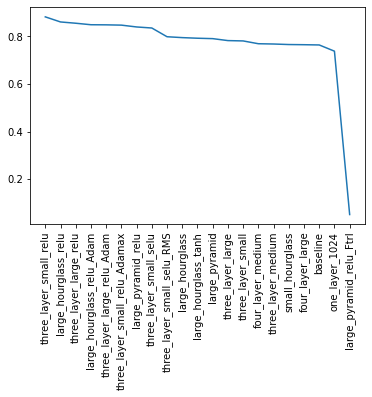

In [84]:
plt.plot(final_results['F1-Score'].sort_values(ascending=False))
plt.xticks(rotation=90);

In [12]:
best_model = Sequential([
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(7,activation='softmax')
    ], name="three_layer_small_relu")
best_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
best_hist = best_model.fit(
            x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=5, batch_size=256
        )

Epoch 1/5
12/12 [==============================] - 5s 47ms/step - loss: 0.9960 - accuracy: 0.6561 - val_loss: 0.6442 - val_accuracy: 0.7869
Epoch 2/5
12/12 [==============================] - 0s 24ms/step - loss: 0.4931 - accuracy: 0.8366 - val_loss: 0.5179 - val_accuracy: 0.8231
Epoch 3/5
12/12 [==============================] - 0s 22ms/step - loss: 0.3250 - accuracy: 0.8920 - val_loss: 0.4315 - val_accuracy: 0.8660
Epoch 4/5
12/12 [==============================] - 0s 19ms/step - loss: 0.2266 - accuracy: 0.9307 - val_loss: 0.4554 - val_accuracy: 0.8539
Epoch 5/5
12/12 [==============================] - 0s 21ms/step - loss: 0.1723 - accuracy: 0.9493 - val_loss: 0.3906 - val_accuracy: 0.8713


In [14]:
best_model.evaluate(x_test_scaled,y_test_labelled)

24/24 [==============================] - 0s 3ms/step - loss: 0.3906 - accuracy: 0.8713


[0.3905893564224243, 0.8713136911392212]

In [19]:
def load_test_images():
    test_data_dir = "assignment_3_dataset/h_captcha_test_dataset/"
    images = os.listdir(test_data_dir)
    test_images = []
    for i in images:
        img = Image.open(test_data_dir+i)
        gray_img = ImageOps.grayscale(img)
        
        gray_img = np.array(gray_img)
#         if gray_img.shape!=(128,128,3):
        gray_img = cv2.resize(gray_img,(32,32))
        
        test_images.append(gray_img)
    test_images = np.array(test_images)
    test_images = np.reshape(test_images,(test_images.shape[0],test_images.shape[1]*test_images.shape[1]))
    return test_images

test_images = load_test_images()
test_images.shape

(71, 1024)

In [20]:
best_preds = best_model.predict(test_images)

In [22]:
best_pred_classes = np.argmax(best_preds,axis=1)
best_pred_classes

array([0, 1, 5, 2, 1, 5, 4, 2, 5, 1, 2, 2, 5, 2, 2, 2, 0, 4, 2, 5, 2, 5,
       5, 1, 0, 0, 5, 4, 4, 2, 0, 5, 5, 0, 5, 2, 5, 1, 2, 1, 5, 1, 5, 5,
       2, 2, 2, 5, 5, 5, 2, 0, 2, 2, 1, 5, 5, 2, 5, 2, 1, 5, 5, 2, 1, 0,
       2, 5, 2, 5, 4], dtype=int64)

In [28]:
best_pred_class_names = le.inverse_transform(best_pred_classes)

In [31]:
test_data_description['true_labels'] = best_pred_class_names
# test_data_description
test_data_description[['test_id','true_labels']].to_csv("Best_preds_Aakash.csv")

### Experimenting with initializers.

In [13]:
leaky_relu = tf.keras.layers.LeakyReLU(alpha=0.2)

In [43]:
ini_model = Sequential([
    # Using 512 and 256 gives almost same F1 score as with using 1024
    layers.Dense(1024,activation=leaky_relu,kernel_initializer="he_normal"), # These two lines give F1-Score as 0.85
    layers.BatchNormalization(),
    layers.Dense(256,activation=leaky_relu,kernel_initializer="he_normal"),
#     layers.Dense(256,activation=leaky_relu,kernel_initializer="he_normal"),
#     layers.Dense(1024,activation="selu",kernel_initializer="lecun_normal"), # This gives F1-Score as 0.82
#     layers.Dense(128,activation="selu",kernel_initializer="lecun_normal"),
    layers.BatchNormalization(),
    layers.Dense(7,activation='softmax')
])
ini_model .compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
ini_model_hist = ini_model .fit(x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=5, batch_size=256)

Epoch 1/5
12/12 [==============================] - 1s 30ms/step - loss: 1.0416 - accuracy: 0.6773 - val_loss: 1.4904 - val_accuracy: 0.6796
Epoch 2/5
12/12 [==============================] - 0s 24ms/step - loss: 0.4506 - accuracy: 0.8499 - val_loss: 0.9440 - val_accuracy: 0.7708
Epoch 3/5
12/12 [==============================] - 0s 29ms/step - loss: 0.3264 - accuracy: 0.8923 - val_loss: 0.6909 - val_accuracy: 0.8043
Epoch 4/5
12/12 [==============================] - 0s 24ms/step - loss: 0.2274 - accuracy: 0.9321 - val_loss: 0.5854 - val_accuracy: 0.8217
Epoch 5/5
12/12 [==============================] - 0s 24ms/step - loss: 0.1642 - accuracy: 0.9556 - val_loss: 0.5497 - val_accuracy: 0.8391


In [44]:
ini_model_result = calculate_results(y_test_labelled,preds(ini_model,x_test_scaled))
ini_model_result

{'Precision': 0.8438009279557941,
 'Recall': 0.8289453428341099,
 'F1-Score': 0.8241632014903024}

In [12]:
# The model is actually not overfitting, so there is not much sense to use
# dropout and regularizers. 
drop_model = Sequential([
    layers.Dense(1024),
    layers.Dropout(0.2),
    layers.Dense(1024),
    layers.Dropout(0.2),
    layers.Dense(1024),
    layers.Dense(256,kernel_regularizer=tf.keras.regularizers.L1(0.01)),
    layers.Dense(64),
    layers.Dense(7,activation='softmax')
])
drop_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
d = drop_model.fit(x_train_scaled,y_train_labelled,
                                   validation_data=(x_test_scaled,y_test_labelled),
                                   epochs=5, batch_size=256)

Epoch 1/5
12/12 [==============================] - 3s 133ms/step - loss: 89.1102 - accuracy: 0.5408 - val_loss: 77.9066 - val_accuracy: 0.6743
Epoch 2/5
12/12 [==============================] - 1s 103ms/step - loss: 70.9124 - accuracy: 0.6703 - val_loss: 61.6623 - val_accuracy: 0.7440
Epoch 3/5
12/12 [==============================] - 1s 103ms/step - loss: 54.8393 - accuracy: 0.7439 - val_loss: 46.6510 - val_accuracy: 0.8016
Epoch 4/5
12/12 [==============================] - 1s 110ms/step - loss: 40.4347 - accuracy: 0.7989 - val_loss: 33.2738 - val_accuracy: 0.7922
Epoch 5/5
12/12 [==============================] - 1s 104ms/step - loss: 27.9382 - accuracy: 0.8363 - val_loss: 22.0554 - val_accuracy: 0.8150


### Trying CNNs.

In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [33]:
# Image data generators
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_image_data = train_datagen.flow_from_directory(directory=train_dir,
                                                    target_size=(128,128),
                                                    batch_size=32,
                                                    class_mode="categorical")

# Setting shuffle to false in test data so as to avoid errors
# while testing our predictions.
test_image_data = test_datagen.flow_from_directory(directory=test_dir,
                                                  target_size=(128,128),
                                                  batch_size=32,
                                                  class_mode="categorical",
                                                  shuffle=False)

Found 3018 images belonging to 7 classes.
Found 746 images belonging to 7 classes.


In [16]:
c1 = Sequential([
    Conv2D(filters=5,kernel_size=3,strides=1,activation='relu',input_shape=(128,128,3)),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    
    Dense(7,activation='softmax')
])
c1.compile(loss="categorical_crossentropy",
          optimizer="adam",
          metrics=['accuracy'])

In [17]:
c1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 5)       140       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 19845)             0         
_________________________________________________________________
dense (Dense)                (None, 7)                 138922    
Total params: 139,062
Trainable params: 139,062
Non-trainable params: 0
_________________________________________________________________


In [18]:
h1_cnn = c1.fit(train_image_data, validation_data=test_image_data,epochs=5)

Epoch 1/5
95/95 [==============================] - 16s 125ms/step - loss: 1.0296 - accuracy: 0.6561 - val_loss: 0.5153 - val_accuracy: 0.8499
Epoch 2/5
95/95 [==============================] - 8s 82ms/step - loss: 0.3575 - accuracy: 0.8920 - val_loss: 0.3816 - val_accuracy: 0.8700
Epoch 3/5
95/95 [==============================] - 11s 115ms/step - loss: 0.2543 - accuracy: 0.9254 - val_loss: 0.3203 - val_accuracy: 0.9102
Epoch 4/5
95/95 [==============================] - 11s 111ms/step - loss: 0.1765 - accuracy: 0.9573 - val_loss: 0.3285 - val_accuracy: 0.8874
Epoch 5/5
95/95 [==============================] - 12s 122ms/step - loss: 0.1398 - accuracy: 0.9669 - val_loss: 0.2742 - val_accuracy: 0.9182


<AxesSubplot:>

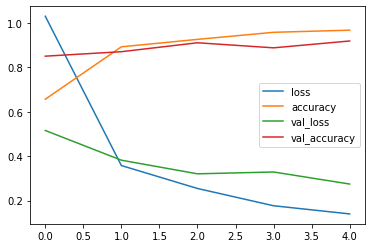

In [19]:
pd.DataFrame(h1_cnn.history).plot()

In [37]:
c1.evaluate(test_image_data)

24/24 [==============================] - 1s 40ms/step - loss: 0.2742 - accuracy: 0.9182


[0.27423450350761414, 0.9182305335998535]

In [27]:
pre = c1.predict(test_image_data)

In [28]:
pred_classes = np.argmax(pre,axis=1)

In [29]:
pre.shape, pred_classes.shape

((746, 7), (746,))

In [34]:
# pred_classes

In [33]:
calculate_results(test_image_data.classes,pred_classes)

{'Precision': 0.921688261534339,
 'Recall': 0.9061737645328632,
 'F1-Score': 0.9123811195158134}

In [56]:
c2 = Sequential([
    Conv2D(filters=8,kernel_size=5,strides=1,activation='relu',input_shape=(128,128,3)),
    MaxPool2D(pool_size=2),
    
    Conv2D(filters=3,kernel_size=7,strides=1,activation='relu'),
    MaxPool2D(pool_size=2),
    
#     Conv2D(filters=5,kernel_size=3,strides=1,activation='relu'),
#     MaxPool2D(pool_size=2),
    
    Flatten(),
    
    Dense(7,activation='softmax')
])
c2.compile(loss="categorical_crossentropy",
          optimizer="adam",
          metrics=['accuracy'])
h2_cnn = c2.fit(train_image_data, validation_data=test_image_data,epochs=5)

# The same wrchitecture as model 1 gave better validation accuracy(93.3%) with kernel_size=5
# However making kernel_size=7 gave validation accuracy of 88.2%
# 

Epoch 1/5
95/95 [==============================] - 20s 207ms/step - loss: 1.0704 - accuracy: 0.6156 - val_loss: 0.6343 - val_accuracy: 0.8016
Epoch 2/5
95/95 [==============================] - 20s 205ms/step - loss: 0.5197 - accuracy: 0.8244 - val_loss: 0.6162 - val_accuracy: 0.8029
Epoch 3/5
95/95 [==============================] - 19s 202ms/step - loss: 0.4269 - accuracy: 0.8506 - val_loss: 0.4967 - val_accuracy: 0.8391
Epoch 4/5
95/95 [==============================] - 20s 205ms/step - loss: 0.3749 - accuracy: 0.8791 - val_loss: 0.4830 - val_accuracy: 0.8405
Epoch 5/5
95/95 [==============================] - 20s 205ms/step - loss: 0.3073 - accuracy: 0.8989 - val_loss: 0.4386 - val_accuracy: 0.8686


In [57]:
c2.evaluate(test_image_data)

24/24 [==============================] - 1s 37ms/step - loss: 0.4386 - accuracy: 0.8686


[0.4385554790496826, 0.8686327338218689]

In [41]:
# Trying another model
c3 = Sequential([
    Conv2D(filters=5,kernel_size=(2,4),strides=1,activation='relu',input_shape=(128,128,3)),
    MaxPool2D(pool_size=2),
    
    Flatten(),
    
    Dense(7,activation='softmax')
])
opt = tf.keras.optimizers.SGD(momentum=0.9)
c3.compile(loss="categorical_crossentropy",
          optimizer=opt,
          metrics=['accuracy'])
h3_cnn = c3.fit(train_image_data, validation_data=test_image_data,epochs=5)

Epoch 1/5
95/95 [==============================] - 11s 112ms/step - loss: 1.3968 - accuracy: 0.4917 - val_loss: 0.6344 - val_accuracy: 0.8097
Epoch 2/5
95/95 [==============================] - 10s 109ms/step - loss: 0.6273 - accuracy: 0.8025 - val_loss: 0.7141 - val_accuracy: 0.7761
Epoch 3/5
95/95 [==============================] - 11s 111ms/step - loss: 0.4544 - accuracy: 0.8549 - val_loss: 0.4875 - val_accuracy: 0.8646
Epoch 4/5
95/95 [==============================] - 12s 123ms/step - loss: 0.3280 - accuracy: 0.8956 - val_loss: 0.5592 - val_accuracy: 0.8217
Epoch 5/5
95/95 [==============================] - 11s 112ms/step - loss: 0.2112 - accuracy: 0.9347 - val_loss: 0.5296 - val_accuracy: 0.8365


In [40]:
c3.evaluate(test_image_data)

24/24 [==============================] - 1s 56ms/step - loss: 0.5773 - accuracy: 0.8351


[0.5772548913955688, 0.8351206183433533]

In [34]:
def load_test_images():
    test_data_dir = "assignment_3_dataset/h_captcha_test_dataset/"
    images = os.listdir(test_data_dir)
    test_images = []
    for i in images:
        img = Image.open(test_data_dir+i)
        img = np.array(img)
        if img.shape!=(128,128,3):
            img = cv2.resize(img,(128,128))
        test_images.append(img)
    return np.array(test_images)

In [35]:
test_images = load_test_images()

In [24]:
test_data_description = pd.read_csv("assignment_3_dataset/test_data_description_h_captcha_assignment3.csv")
test_data_description.head()

,test_id,test_image_name
0,0,11
1,1,12
2,2,14
3,3,17
4,4,18


In [25]:
def final_predictions(model,test_images,test_data_description):
    labels = (test_image_data.class_indices)
    labels = dict((v,k) for k,v in labels.items())
    final_probs = model.predict(test_images)
    final_preds = np.argmax(final_probs,axis=1)
    final_labels = [labels[k] for k in final_preds]
    test_data_description['true_labels'] = final_labels
    return test_data_description[['test_id','true_labels']]

In [103]:
final_predictions(c1,test_images,test_data_description)

,test_id,true_labels
0,0,bicycle
1,1,bicycle
2,2,bicycle
3,3,boat
4,4,truck
...,...,...
66,66,bicycle
67,67,motorbus
68,68,motorbus
69,69,truck


In [36]:
test_images.shape

(71, 128, 128, 3)